In [279]:
from sklearn import datasets, neighbors, metrics, cluster
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()


The pixel values for the first image:

In [280]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [281]:
num_examples = len(digits.data)
training_length = int(0.7*num_examples)

train_features = digits.data[:training_length]
train_labels =  digits.target[:training_length]
test_features = digits.data[training_length:]
test_labels = digits.target[training_length:]

In [282]:
n_neighbors = 5

kNNClassifier = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
kNNClassifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

In [283]:
predicted = kNNClassifier.predict(test_features)
distances, neighbor_indices = kNNClassifier.kneighbors(test_features)
print("Classification report for classifier %s:\n%s\n"
      % (kNNClassifier, metrics.classification_report(test_labels, predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540




i, i matrix, where the value at M[i,i] is the amount of times the digit i is predicted to the digit i. So M[0,4] = 1 here means that the digit 4 has been predicted to be a 0 one time

In [284]:
metrics.confusion_matrix(test_labels, predicted)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 52]])

Visualize predictions:

test
test
test


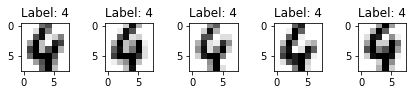

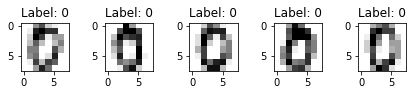

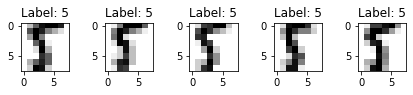

In [285]:
#plt.imshow(digits.images[neighbor_indices[0][0]], cmap=plt.cm.gray_r, interpolation='nearest')
for j in range(3):
    #plt.subplot(1, 6, 1)
    print('test')
    #plt.imshow(digits.images[neighbor_indices[j][0]], cmap=plt.cm.gray_r, interpolation='nearest')
    fig, axis = plt.subplots(nrows=1, ncols=5)
    fig.tight_layout(pad=1.0)
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        img_mat = np.reshape(digits.data[neighbor_indices[j][i]], (8,8))
        plt.imshow(img_mat, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Label: %i' % digits.target[neighbor_indices[j][i]])
        #'Predicted as: %i' % predicted[i]



In [299]:
print(distances, neighbor_indices)

[[11.66190379 16.94107435 18.16590212 19.31320792 20.19900988]
 [21.09502311 21.47091055 21.61018278 21.74856317 21.81742423]
 [18.02775638 18.1934054  19.62141687 21.16601049 21.9317122 ]
 ...
 [20.83266666 21.70253441 22.93468988 24.0208243  25.63201124]
 [19.5192213  21.09502311 23.87467277 24.69817807 24.8394847 ]
 [26.73948391 27.62245463 27.73084925 27.80287755 27.92848009]] [[ 353  817  297  366 1254]
 [1177  588  725  824  328]
 [ 376  791  801  165  896]
 ...
 [ 148  248  242 1069  255]
 [ 254  251  849  417  199]
 [ 183  248 1015  513  224]]


PART 5

In [286]:
cluster_classifier = cluster.KMeans(n_clusters=10)
clusters = cluster_classifier.fit(train_features)

In [297]:
print(cluster_classifier.cluster_centers_)

[[ 0.00000000e+00  0.00000000e+00  2.09090909e-01  7.10000000e+00
   1.23636364e+01  1.72727273e+00  2.09090909e-01  7.27272727e-02
   1.30104261e-18  1.81818182e-02  3.18181818e+00  1.39909091e+01
   9.07272727e+00  1.92727273e+00  1.24545455e+00  3.45454545e-01
   6.50521303e-19  7.09090909e-01  1.08727273e+01  1.18545455e+01
   4.98181818e+00  5.69090909e+00  4.27272727e+00  4.09090909e-01
   9.09090909e-03  5.00000000e+00  1.48272727e+01  6.22727273e+00
   7.76363636e+00  1.03545455e+01  5.63636364e+00  2.72727273e-02
   0.00000000e+00  8.78181818e+00  1.47545455e+01  9.95454545e+00
   1.36545455e+01  1.39545455e+01  5.17272727e+00  0.00000000e+00
   1.18181818e-01  5.85454545e+00  1.06272727e+01  1.19818182e+01
   1.49727273e+01  1.05545455e+01  1.68181818e+00  1.73472348e-18
   9.09090909e-02  9.09090909e-01  2.07272727e+00  7.19090909e+00
   1.41909091e+01  3.58181818e+00  2.72727273e-02  2.77555756e-17
   3.25260652e-19  2.72727273e-02  2.81818182e-01  7.99090909e+00
   1.25363

In [288]:
cluster_predicted = cluster_classifier.predict(test_features)

In [289]:
print("Classification report for classifier %s:\n%s\n"
      % (cluster_classifier, metrics.classification_report(test_labels, cluster_predicted)))
metrics.confusion_matrix(test_labels, cluster_predicted)

Classification report for classifier KMeans(n_clusters=10):
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        53
           1       0.00      0.00      0.00        53
           2       0.04      0.06      0.05        53
           3       0.05      0.06      0.05        53
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        56
           6       0.98      0.96      0.97        54
           7       0.00      0.00      0.00        54
           8       0.41      0.63      0.50        52
           9       0.20      0.09      0.13        55

    accuracy                           0.18       540
   macro avg       0.17      0.18      0.17       540
weighted avg       0.17      0.18      0.17       540




array([[ 1,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 35, 17],
       [ 0,  7,  3,  0,  0,  1,  0, 41,  1,  0],
       [ 0, 40,  1,  3,  2,  0,  0,  0,  7,  0],
       [52,  0,  0,  2,  0,  1,  0,  0,  1,  1],
       [ 1,  0, 19,  0, 35,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  1,  1],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  3,  0],
       [ 0,  1, 12,  3,  1,  0,  0,  1, 33,  1],
       [ 0,  3, 42,  1,  4,  0,  0,  0,  0,  5]])

In [290]:
clusters_labels = cluster_classifier.predict(train_features)

print("completeness: " + str(metrics.completeness_score( train_labels, clusters_labels)))
print("homogeneity: " + str(metrics.homogeneity_score( train_labels, clusters_labels)))

print("adjusted mutual information: " + str(metrics.adjusted_mutual_info_score( train_labels, clusters_labels)))

completeness: 0.754241973135867
homogeneity: 0.7457520426489817
adjusted mutual information: 0.7463359745891586


Visualize the results:

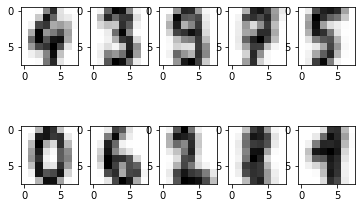

In [295]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img_mat = np.reshape(clusters.cluster_centers_[i], (8,8))
    plt.imshow(img_mat, cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.title('Label: %i' % digits.target[neighbor_indices[j][i]])
    #'Predicted as: %i' % predicted[i]



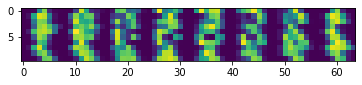

In [296]:
#Before peer review
plt.imshow(clusters.cluster_centers_)